# NFT Market Analysis Project
## Part 2: Remaining Data Collection, Cleaning, and Analysis
---

In [102]:
#Initial imports
import requests
import pandas as pd
import numpy as np
import datetime as dt
import os
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
import csv
from pathlib import Path

In [46]:
#Load API keys file
load_dotenv("OUR_KEYS.env")

True

In [47]:
#Set Crypto Compare API keys for crypto data
cryptocompare_api_key = os.getenv("CRYPTOCOMPARE_API_KEY")
type(cryptocompare_api_key)

str

In [48]:
#Set Alpaca API keys for US stock market data
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_api_key)
type(alpaca_secret_key)

str

## Pull Alpaca data using API, save in Pandas dataframe, and clean the data

In [49]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [50]:
# Set the BITO, ARKK, QQQ, VIT and JPST tickers
ticker = ["BITO" , "ARKK" , "QQQ" , "VTI" , "JPST"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes
start_date = pd.Timestamp("2020-10-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-11-16", tz="America/New_York").isoformat()

# Get 1 month's worth of historical data for all stock tickers
df_ticker = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
df_ticker

ARKK                                        \
                             open      high       low    close   volume   
time                                                                      
2020-10-01 00:00:00-04:00   93.39   94.5000   92.9201   94.500  2343947   
2020-10-02 00:00:00-04:00   91.56   94.0600   91.5500   92.285  2530584   
2020-10-05 00:00:00-04:00   93.56   95.9600   93.5600   95.840  1752378   
2020-10-06 00:00:00-04:00   95.94   97.9100   94.8800   95.640  2516361   
2020-10-07 00:00:00-04:00   97.10  100.0200   97.1000   99.230  3121925   
...                           ...       ...       ...      ...      ...   
2021-11-10 00:00:00-05:00  118.44  120.7850  115.2000  116.650  7568712   
2021-11-11 00:00:00-05:00  118.28  118.7800  117.1000  117.240  3826637   
2021-11-12 00:00:00-05:00  117.77  118.5200  116.7100  118.500  3522223   
2021-11-15 00:00:00-05:00  118.85  119.0500  116.6400  117.440  3476960   
2021-11-16 00:00:00-05:00  116.80  118.9199  116.1200  118.900  3062992   

                            BITO                                     ...  \
                            open    high    low    close     volume  ...   
time                                                                 ...   
2020-10-01 00:00:00-04:00    NaN     NaN    NaN      NaN        NaN  ...   
2020-10-02 00:00:00-04:00    NaN     NaN    NaN      NaN        NaN  ...   
2020-10-05 00:00:00-04:00    NaN     NaN    NaN      NaN        NaN  ...   
2020-10-06 00:00:00-04:00    NaN     NaN    NaN      NaN        NaN  ...   
2020-10-07 00:00:00-04:00    NaN     NaN    NaN      NaN        NaN  ...   
...                          ...     ...    ...      ...        ...  ...   
2021-11-10 00:00:00-05:00  43.92  44.290  41.84  42.3150  8456320.0  ...   
2021-11-11 00:00:00-05:00  41.57  42.135  41.45  41.6300  2869373.0  ...   
2021-11-12 00:00:00-05:00  40.88  41.290  39.95  41.1300  7334627.0  ...   
2021-11-15 00:00:00-05:00  41.79  41.860  40.73  40.8900  5585604.0  ...   
2021-11-16 00:00:00-05:00  38.92  39.360  37.91  38.2516  7198249.0  ...   

                              QQQ                                       \
                             open      high      low   close    volume   
time                                                                     
2020-10-01 00:00:00-04:00  281.80  282.8794  279.840  282.26  44619187   
2020-10-02 00:00:00-04:00  276.01  282.2412  273.440  274.33  66549291   
2020-10-05 00:00:00-04:00  276.34  280.4900  276.230  280.32  24187810   
2020-10-06 00:00:00-04:00  279.29  281.1900  274.250  275.15  43641201   
2020-10-07 00:00:00-04:00  277.83  280.7400  277.280  280.11  24402450   
...                           ...       ...      ...     ...       ...   
2021-11-10 00:00:00-05:00  392.47  395.3600  387.530  389.49  49753283   
2021-11-11 00:00:00-05:00  392.57  392.7500  390.240  390.62  28990905   
2021-11-12 00:00:00-05:00  391.77  395.2500  390.130  394.72  30500126   
2021-11-15 00:00:00-05:00  395.91  396.2400  392.095  394.63  30051286   
2021-11-16 00:00:00-05:00  393.87  397.9300  393.660  397.50  24351631   

                              VTI                                      
                             open      high      low   close   volume  
time                                                                   
2020-10-01 00:00:00-04:00  171.72  172.2500  170.610  171.73  2955015  
2020-10-02 00:00:00-04:00  168.65  171.3073  168.230  170.34  2350394  
2020-10-05 00:00:00-04:00  171.61  173.5300  171.330  173.46  2499194  
2020-10-06 00:00:00-04:00  173.73  174.9800  171.010  171.31  2776243  
2020-10-07 00:00:00-04:00  172.99  174.7290  172.940  174.31  1949237  
...                           ...       ...      ...     ...      ...  
2021-11-10 00:00:00-05:00  241.14  241.9600  238.730  239.67  3260686  
2021-11-11 00:00:00-05:00  240.67  240.7580  239.955  239.98  2252384  
2021-11-12 00:00:00-05:00  240.64  242.0400  240.212  241.81  2328133  
2021-11-15 0

In [51]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of BITO, ARKK, QQQ, VTI and JPST
df_closing_prices["BITO"] = df_ticker["BITO"]["close"]
df_closing_prices["ARKK"] = df_ticker["ARKK"]["close"]
df_closing_prices["QQQ"] = df_ticker["QQQ"]["close"]
df_closing_prices["VTI"] = df_ticker["VTI"]["close"]
df_closing_prices["JPST"] = df_ticker["JPST"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()

# Display sample data
df_daily_returns

,BITO,ARKK,QQQ,VTI,JPST
2021-10-20,0.032697,-0.006104,-0.001225,0.004160,0.000197
2021-10-21,-0.056621,0.006731,0.006107,0.002904,-0.000197
2021-10-22,-0.032582,-0.015962,-0.008588,-0.001746,-0.000395
2021-10-25,0.027349,0.034480,0.010400,0.005674,0.000198
2021-10-26,-0.012571,-0.005582,0.002540,0.000042,-0.000198
2021-10-27,-0.049176,-0.019401,0.002824,-0.007254,0.000217
2021-10-28,0.038855,0.024415,0.011186,0.010682,-0.000020
2021-10-29,0.020470,-0.003780,0.004893,0.001607,-0.000395
2021-11-01,-0.021421,0.032338,0.003497,0.005023,-0.000593
2021-11-02,0.037075,-0.016621,0.004362,0.002982,0.000000


In [52]:
#Save the dataframe with the Alpaca stock data as a csv file
df_ticker.to_csv(path_or_buf='Output_csv_data_files/stocks/ticker_data.csv')
df_daily_returns.to_csv(path_or_buf='Output_csv_data_files/stocks/daily_returns.csv')
df_closing_prices.to_csv(path_or_buf='Output_csv_data_files/stocks/closing_prices.csv')

## Pull Cryptocompare data using API, save in Pandas dataframe, and clean the data

In [255]:
#Create Ethereum API URL
eth_volume_url = "https://min-api.cryptocompare.com/data/symbol/histoday?fsym=ETH&tsym=USD&limit=2000"
eth_price_url = "https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=2000"

In [256]:
#Request historical Ethereum data from Crypto Compare
eth_volume_response_data = requests.get(eth_volume_url).json()
eth_price_response_data = requests.get(eth_price_url).json()

#print(json.dumps([eth_price_response_data], indent=4))

In [257]:
#Create new dataframe to store historical ETH data
eth_data = pd.DataFrame()

In [258]:
#Extract data from API data into newly created dataframe
day_list_range = [i for i in range(0,2001)]

eth_date_data = []
eth_volume_data = []
eth_close_data = []

for l in day_list_range:
    date_data = dt.datetime.fromtimestamp(int(eth_volume_response_data["Data"][l]["time"])).strftime('%m/%d/%Y')
    volume_data = eth_volume_response_data["Data"][l]["total_volume_total"]
    close_data = eth_price_response_data["Data"]["Data"][l]["close"]
    
    eth_date_data.append(date_data)
    eth_volume_data.append(volume_data)
    eth_close_data.append(close_data)

eth_data["Date"] = eth_date_data
eth_data["ETH_Daily_Volume_(USD)"] = eth_volume_data
eth_data["ETH_Close_Price_(USD)"] = eth_close_data

eth_data = eth_data.set_index("Date")
eth_data

,ETH_Daily_Volume_(USD),ETH_Close_Price_(USD)
Date,,
05/26/2016,105900209.8,11.18
05/27/2016,88635808.96,11.73
05/28/2016,52082279.3,12.23
05/29/2016,27727313.81,12.66
05/30/2016,79779048.24,13.94
...,...,...
11/12/2021,17146911320.450001,4645.64
11/13/2021,15539938801.35,4627.50
11/14/2021,20093073123.560001,4561.38


In [233]:
#Save the dataframe with the gas price data as a csv file
eth_data.to_csv(path_or_buf='Output_csv_data_files/crypto/eth_data.csv')

## Import Ethereum gas price data, save in Pandas dataframe, and clean the data

Gas price data pulled in csv format directly from: https://etherscan.io/gastracker

In [283]:
#Ethereum gas prices imported in a new dataframe from the downloaded csv file
gas_price_path = Path("Reference_data/export-AvgGasPrice.csv")
raw_gas_prices = pd.read_csv(gas_price_path, index_col="Date(UTC)")

raw_gas_prices

,UnixTimeStamp,Value (Wei)
Date(UTC),,
7/30/2015,1438214400,0
7/31/2015,1438300800,0
8/1/2015,1438387200,0
8/2/2015,1438473600,0
8/3/2015,1438560000,0
...,...,...
11/11/2021,1636588800,167059976680
11/12/2021,1636675200,154765662719
11/13/2021,1636761600,136558244852


In [284]:
#Drop the Unix Time Stamp from the dataframe since we already have the date column
raw_gas_prices = raw_gas_prices.drop(["UnixTimeStamp"],axis="columns")
raw_gas_prices.columns = ["Gas_Price_(Wei)"]


#Bring ETH price data into this dataframe to be able to perform conversion from WEI to USD
gas_prices = pd.concat([raw_gas_prices, eth_data], axis="columns", join="inner").drop(["ETH_Daily_Volume_(USD)"],axis="columns")
gas_prices.head()

,Gas_Price_(Wei),ETH_Close_Price_(USD)
10/10/2016,23808820587,11.70
10/11/2016,24289033632,11.72
10/12/2016,26037096488,12.10
10/13/2016,74508549155,11.90
10/14/2016,47491822159,11.91


In [285]:
#Convert gas prices to USD
#Need to converting WEI to ETH: 1 ETH = 10**18 WEI = 1000000000000000000 WEI
gas_prices["Gas_Price_(USD)"] = (gas_prices["Gas_Price_(Wei)"] / (10**18) * gas_prices["ETH_Close_Price_(USD)"]).round(6)

gas_prices

,Gas_Price_(Wei),ETH_Close_Price_(USD),Gas_Price_(USD)
10/10/2016,23808820587,11.70,0.000000
10/11/2016,24289033632,11.72,0.000000
10/12/2016,26037096488,12.10,0.000000
10/13/2016,74508549155,11.90,0.000001
10/14/2016,47491822159,11.91,0.000001
...,...,...,...
11/11/2021,167059976680,4668.70,0.000780
11/12/2021,154765662719,4645.64,0.000719
11/13/2021,136558244852,4627.50,0.000632
11/14/2021,118460320428,4561.38,0.000540


In [287]:
#Save the dataframe with the gas price data as a csv file
gas_prices.to_csv(path_or_buf='Output_csv_data_files/crypto/gas_price_data.csv')

## Import OpenSea csv files from Part 1

In [3]:
#Import the NFT csv files that were output from the NFT data collection code
file_path_1 = Path("Output_csv_data_files/baby_ape_assets.csv")
baby_ape_assets = pd.read_csv(file_path_1, index_col="asset_id")

file_path_2 = Path("Output_csv_data_files/baby_ape_listings.csv")
baby_ape_listings = pd.read_csv(file_path_2, index_col="event_id")

file_path_3 = Path("Output_csv_data_files/baby_ape_sales.csv")
baby_ape_sales = pd.read_csv(file_path_3, index_col="event_id")

file_path_1 = Path("Output_csv_data_files/baby_ape_assets.csv")
baby_ape_assets = pd.read_csv(file_path_1, index_col="asset_id")

file_path_2 = Path("Output_csv_data_files/baby_ape_listings.csv")
baby_ape_listings = pd.read_csv(file_path_2, index_col="event_id")

file_path_3 = Path("Output_csv_data_files/baby_ape_sales.csv")
baby_ape_sales = pd.read_csv(file_path_3, index_col="event_id")

file_path_1 = Path("Output_csv_data_files/baby_ape_assets.csv")
baby_ape_assets = pd.read_csv(file_path_1, index_col="asset_id")

file_path_2 = Path("Output_csv_data_files/baby_ape_listings.csv")
baby_ape_listings = pd.read_csv(file_path_2, index_col="event_id")

file_path_3 = Path("Output_csv_data_files/baby_ape_sales.csv")
baby_ape_sales = pd.read_csv(file_path_3, index_col="event_id")

file_path_1 = Path("Output_csv_data_files/baby_ape_assets.csv")
baby_ape_assets = pd.read_csv(file_path_1, index_col="asset_id")

file_path_2 = Path("Output_csv_data_files/baby_ape_listings.csv")
baby_ape_listings = pd.read_csv(file_path_2, index_col="event_id")

file_path_3 = Path("Output_csv_data_files/baby_ape_sales.csv")
baby_ape_sales = pd.read_csv(file_path_3, index_col="event_id")

file_path_1 = Path("Output_csv_data_files/baby_ape_assets.csv")
baby_ape_assets = pd.read_csv(file_path_1, index_col="asset_id")

file_path_2 = Path("Output_csv_data_files/baby_ape_listings.csv")
baby_ape_listings = pd.read_csv(file_path_2, index_col="event_id")

file_path_3 = Path("Output_csv_data_files/baby_ape_sales.csv")
baby_ape_sales = pd.read_csv(file_path_3, index_col="event_id")

## Data Analysis

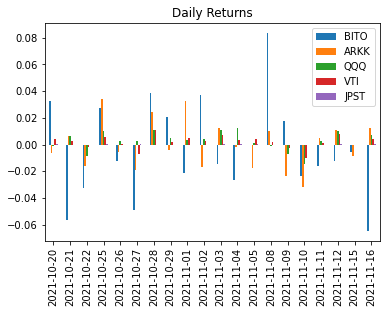

In [22]:
# Plot daily returns
df_daily_returns.plot(kind="bar", title="Daily Returns");

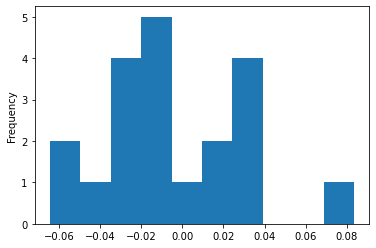

In [23]:
df_daily_returns["BITO"].plot.hist();

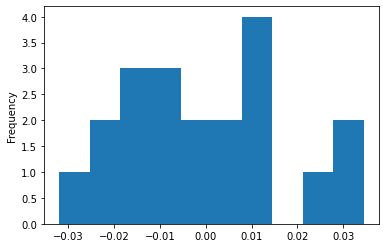

In [24]:
# Visualize distribution of ARKK percent change in closing price using a histogram plot
df_daily_returns["ARKK"].plot.hist();

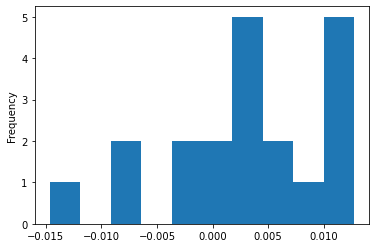

In [25]:
# Visualize distribution of QQQ percent change in closing price using a histogram plot
df_daily_returns["QQQ"].plot.hist();

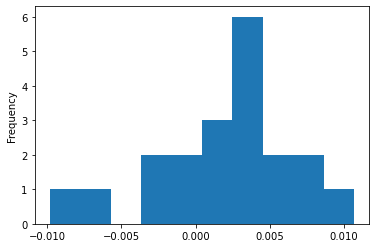

In [26]:
# Visualize distribution of VTI percent change in closing price using a histogram plot
df_daily_returns["VTI"].plot.hist();

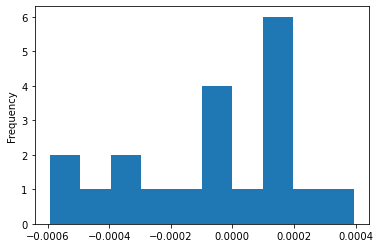

In [27]:
# Visualize distribution of JPST percent change in closing price using a histogram plot
df_daily_returns["JPST"].plot.hist();

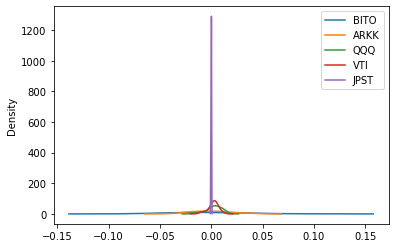

In [29]:
 # Visualize the distribution of percent change in closing price for all stocks using a density plot
df_daily_returns.plot.density();